**GOAL**
    1. 버튼을 배치하고 버튼의 실행명령을 작성할 수 있음
    2. file 처리 다이얼로그를 생성 및 처리할 수 있음
    3. color 처리 다이얼로그를 생성 및 처리할 수 있음
**Contents**
    1. button의 배치
    2. command 옵션과 처리기
    3. file dialog
    4. color dialog

### Message

- w = Message(master, option, ...)
- 자동으로 줄바꿈되어 출력되는 것이 Label과의 차이

### Frame

- w = Frame(master, option, ...)
- 다른 위젯을 그룹화하여 배치하는 일종의 컨테이너 역할
- 지금까지의 실습에서 window라는 창을 레이블이나 버튼을 배치하는 컨테이너로 썼다면
- 직접 창에 올리기보단 프레임에 올린 뒤 프레임을 창에 올리는 방식을 실무에서 선호

### LabelFrame

- w = LabelFrame(master, option, ...)
- 레이블을 가진 프레임임
- text 옵션, labelanchor 옵션 지님

In [ ]:
#윈도우 창 안에 프레임, 프레임 안에 엔트리가 배정되는 아웃풋
from tkinter import *
win = Tk()
lframe = LabelFrame(win, text = '이름', padx = 5, pady = 5)
lframe.pack(padx = 10, pady = 10)
e = Entry(lframe)
e.pack()
win.mainloop()

### Button

- w = Button(master, option = value, ...)
- 응용 프로그램에 버튼 표시 (특정 명령 수행)
- 텍스트나 이미지 표시 가능
- 버튼에 함수 연결 가능 -> 클릭시 자동 호출
- 옵션은 레이블의 메소드와 다수 중복됨
- invoke() 메서드: 콜백 호출(지정된 함수를 실행함), 코드 상에서 누른 효과를 줌
- flash() 메서드: 깜빡 (기본 색상과 activebackground)

In [ ]:
from tkinter import *
from tkinter import messagebox as m

def btn_click():
    lbl['text'] = 'have a nice day'
    m.showinfo('인사완료', '인사를 마쳤습니다')
    
win=Tk()
win.geometry('300x60')

lbl=Label(win, text='hello python',  font='Helvetica 20')
lbl.pack()

btn=Button(win, text='눌러주세요',  command= btn_click, bg='red', fg='white')
btn.pack(fill='x')

### messagebox 모듈

- 메시지 박스를 보여주거나 사용자 응답을 요구함
- 모듈을 통해 다이얼로그 박스 관련 다양한 함수에 접근 가능
- 사용법은 아래와 같음 
    - 모듈 import: from tkinter import messagebox
    - 모듈 통해 함수 call: res = messagebox.askyesno('종료확인', '정말 종료할까요')
    - 사용자 응답에 따른 처리: if res = 'yes': ~else

In [ ]:
from tkinter import *
from tkinter import messagebox as m

window = Tk()
window.title('메시지박스 테스트')
window.geometry('350x200')

def clicked():
      m.showinfo('저장확인', '저장되었습니다.')
      m.showwarning('용량부족', '저장공간이 부족합니다.')  
      m.showerror('에러발생', '에러가 발생했습니다. 종료합니다.')    
      res = m.askquestion('저장확인','정말 덮어쓰시겠습니까?') #res에 T/F로 결과값이 되돌아오니, 각각 조건문으로 처리가 가능함
      res = m.askyesno('종료확인','정말 종료하시겠습니까?')
      res = m.askyesnocancel('Message title','Message content')
      res = m.askokcancel('Message title','Message content')
      res = m.askretrycancel('Message title','Message content')
    
btn = Button(window,text='Click here', command=clicked)
btn.grid(column=0,row=0)
window.mainloop()


### filedialog 모듈

- 다음의 메서드를 지님
    - fname = filedialog.askopenfilename(filetypes)
    - fname = filedialog.asksavesfilename(filetypes)


In [ ]:
from tkinter import filedialog

f = (('Template files', '*.tplate'), #앞은 사용자에게 설명할 문자열, 뒤는 실제 파일타입
        ('HTML files', '*.html;*.htm'),
         ('All files', '*.*'))

fileName = filedialog.askopenfilename(filetypes = f)

### colorchooser 모듈


In [ ]:
from tkinter import colorchooser
c = colorchooser.askcolor()

In [ ]:
#파일을 불러오고 또한 바탕색을 변경할 수 있는 아웃풋
import tkinter as tk
from tkinter import filedialog
from tkinter import colorchooser

win = tk.Tk()

def open_click():
    s= (('텍스트파일', '*.txt'),)
    fname = filedialog.askopenfilename(filetype=s)
    if fname != '':
       f = open(fname,'r')
       data=f.read()
       tx.insert('insert',data)

def color_click():
    color= colorchooser.askcolor()
    tx['bg']=color[1] 
tx = tk.Text(win, width=80, height=20)
tx.pack(side='top' , fill='both', expand=True)
btn=tk.Button(win, text= '파일불러오기', command=open_click)
btn.pack()

btn2=tk.Button(win, text= '바탕색 변경', command=color_click)
btn2.pack()
win.mainloop()

### Menu

- w = Menu(mb, option, ...)
- 드롭다운식 메뉴를 제공
- Menubutton(또는 상위메뉴)의 하위개념임. 상위를 클릭하면 나타남
- 다음의 옵션을 지님
    - tearoff: 메뉴 뜯어내기 가능(1)/불가(0) 설정
    - tearoffcommand: 메뉴 뜯어낼 때 알림 받기
    - command: 메뉴 선택시 실시할 함수(callback) 지정
- 메뉴 타입은 다음과 같음
    - cascade(서브메뉴 있음), command(일반), Checkbutton, Radiobutton, separator(분리바 있음)
- 생성 및 삭제 메소드를 지님
    - .add(kind, coption), .delete(index), .entryconfig(index, state)

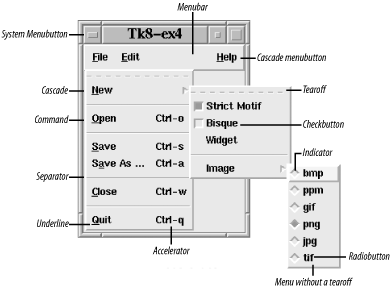

In [ ]:
#메인 메뉴 넣기
#메뉴객체 생성-생성된 메뉴객체에 메뉴 추가-창에 등록
from tkinter import *
win = Tk()
mbar = Menu(win)
mbar.add_cascade(label = '파일')
mbar.add_cascade(label = '편집')
mbar.add_cascade(label = '도움말')
win['menu'] = mbar
win.mainloop()

In [ ]:
#서브메뉴까지 넣기
from tkinter import *
win = Tk()

def menu_click():
    print('메뉴를 선택하셨습니다.')

mbar = Menu(win)

fmenu = Menu(mbar, tearoff=0)
fmenu.add_command(label='Open', command=menu_click)
fmenu.add_command(label='Save', command=menu_click,
                            accelerator='Ctrl+S')
fmenu.add_separator()
fmenu.add_command(label='Exit', command=menu_click)
mbar.add_cascade(label='파일', menu=fmenu)

win.config(menu=mbar) #win['menu'] = mbar과 동치 #config로 접근 & key로 접근 두 방법을 기억
win.bind_all('<Control s>', menu_click)


### 정리

- Button의 command 옵션에 실행할 함수를 지정하면, 특정 함수를 실행시킬 수 있음 
- tkinter에서는 Menu 또는 MenuButton 등 메뉴 관련 다양한 widget을 제공함
- tkinter의 filedialog, colorchooser 등을 사용하면 파일 선택과 컬러 선택 다이얼로그를 구현 가능